In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Regression analysis..


In [7]:
# load Data using pandas
csv_path = "DataSets\\coffee_shop_revenue.csv"
regression_data = pd.read_csv(csv_path)

<span style="color: green; font-weight: bold; font-size: 30px;">Pre-Processing for regression analysis...</span>


In [252]:
regression_data.head(10)

Number_of_Customers_Per_Day  Average_Order_Value  Operating_Hours_Per_Day  \
0                          152                 6.74                       14   
1                          485                 4.50                       12   
2                          398                 9.09                        6   
3                          320                 8.48                       17   
4                          156                 7.44                       17   
5                          121                 8.88                        6   
6                          238                 9.00                       11   
7                           70                 7.81                       10   
8                          152                 8.78                       14   
9                          171                 7.73                        7   

   Number_of_Employees  Marketing_Spend_Per_Day  Location_Foot_Traffic  \
0                    4                   106.62                     97   
1                    8                    57.83                    744   
2                    6                    91.76                    636   
3                    4                   462.63                    770   
4                    2                   412.52                    232   
5                    9                   183.49                    484   
6                    4                   331.35                    156   
7                    3                   273.27                    237   
8                    2                   341.79                    825   
9                    5                   344.51                    135   

   Daily_Revenue  
0        1547.81  
1        2084.68  
2        3118.39  
3        2912.20  
4        1663.42  
5        1155.18  
6        2179.13  
7         890.17  
8        1704.94  
9        2025.55

In [253]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [254]:
# check missing values
print("Missing values: ", regression_data.isnull().sum(), "\n")

Missing values:  Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64 



In [255]:
# check type
print("Data types: ", regression_data.dtypes)

Data types:  Number_of_Customers_Per_Day      int64
Average_Order_Value            float64
Operating_Hours_Per_Day          int64
Number_of_Employees              int64
Marketing_Spend_Per_Day        float64
Location_Foot_Traffic            int64
Daily_Revenue                  float64
dtype: object


_Summary of the dataset_

---

**No missing values found in the dataset.**

**All data types are appropriate:**

    Continuous variables like revenue and spend are float64

    Countable like customers, employees, and hours are int64

**No categorical features present, so no encoding is necessary**

---


<span style="color: green; font-weight: bold; font-size: 30px;">Starting regression analysis...</span>

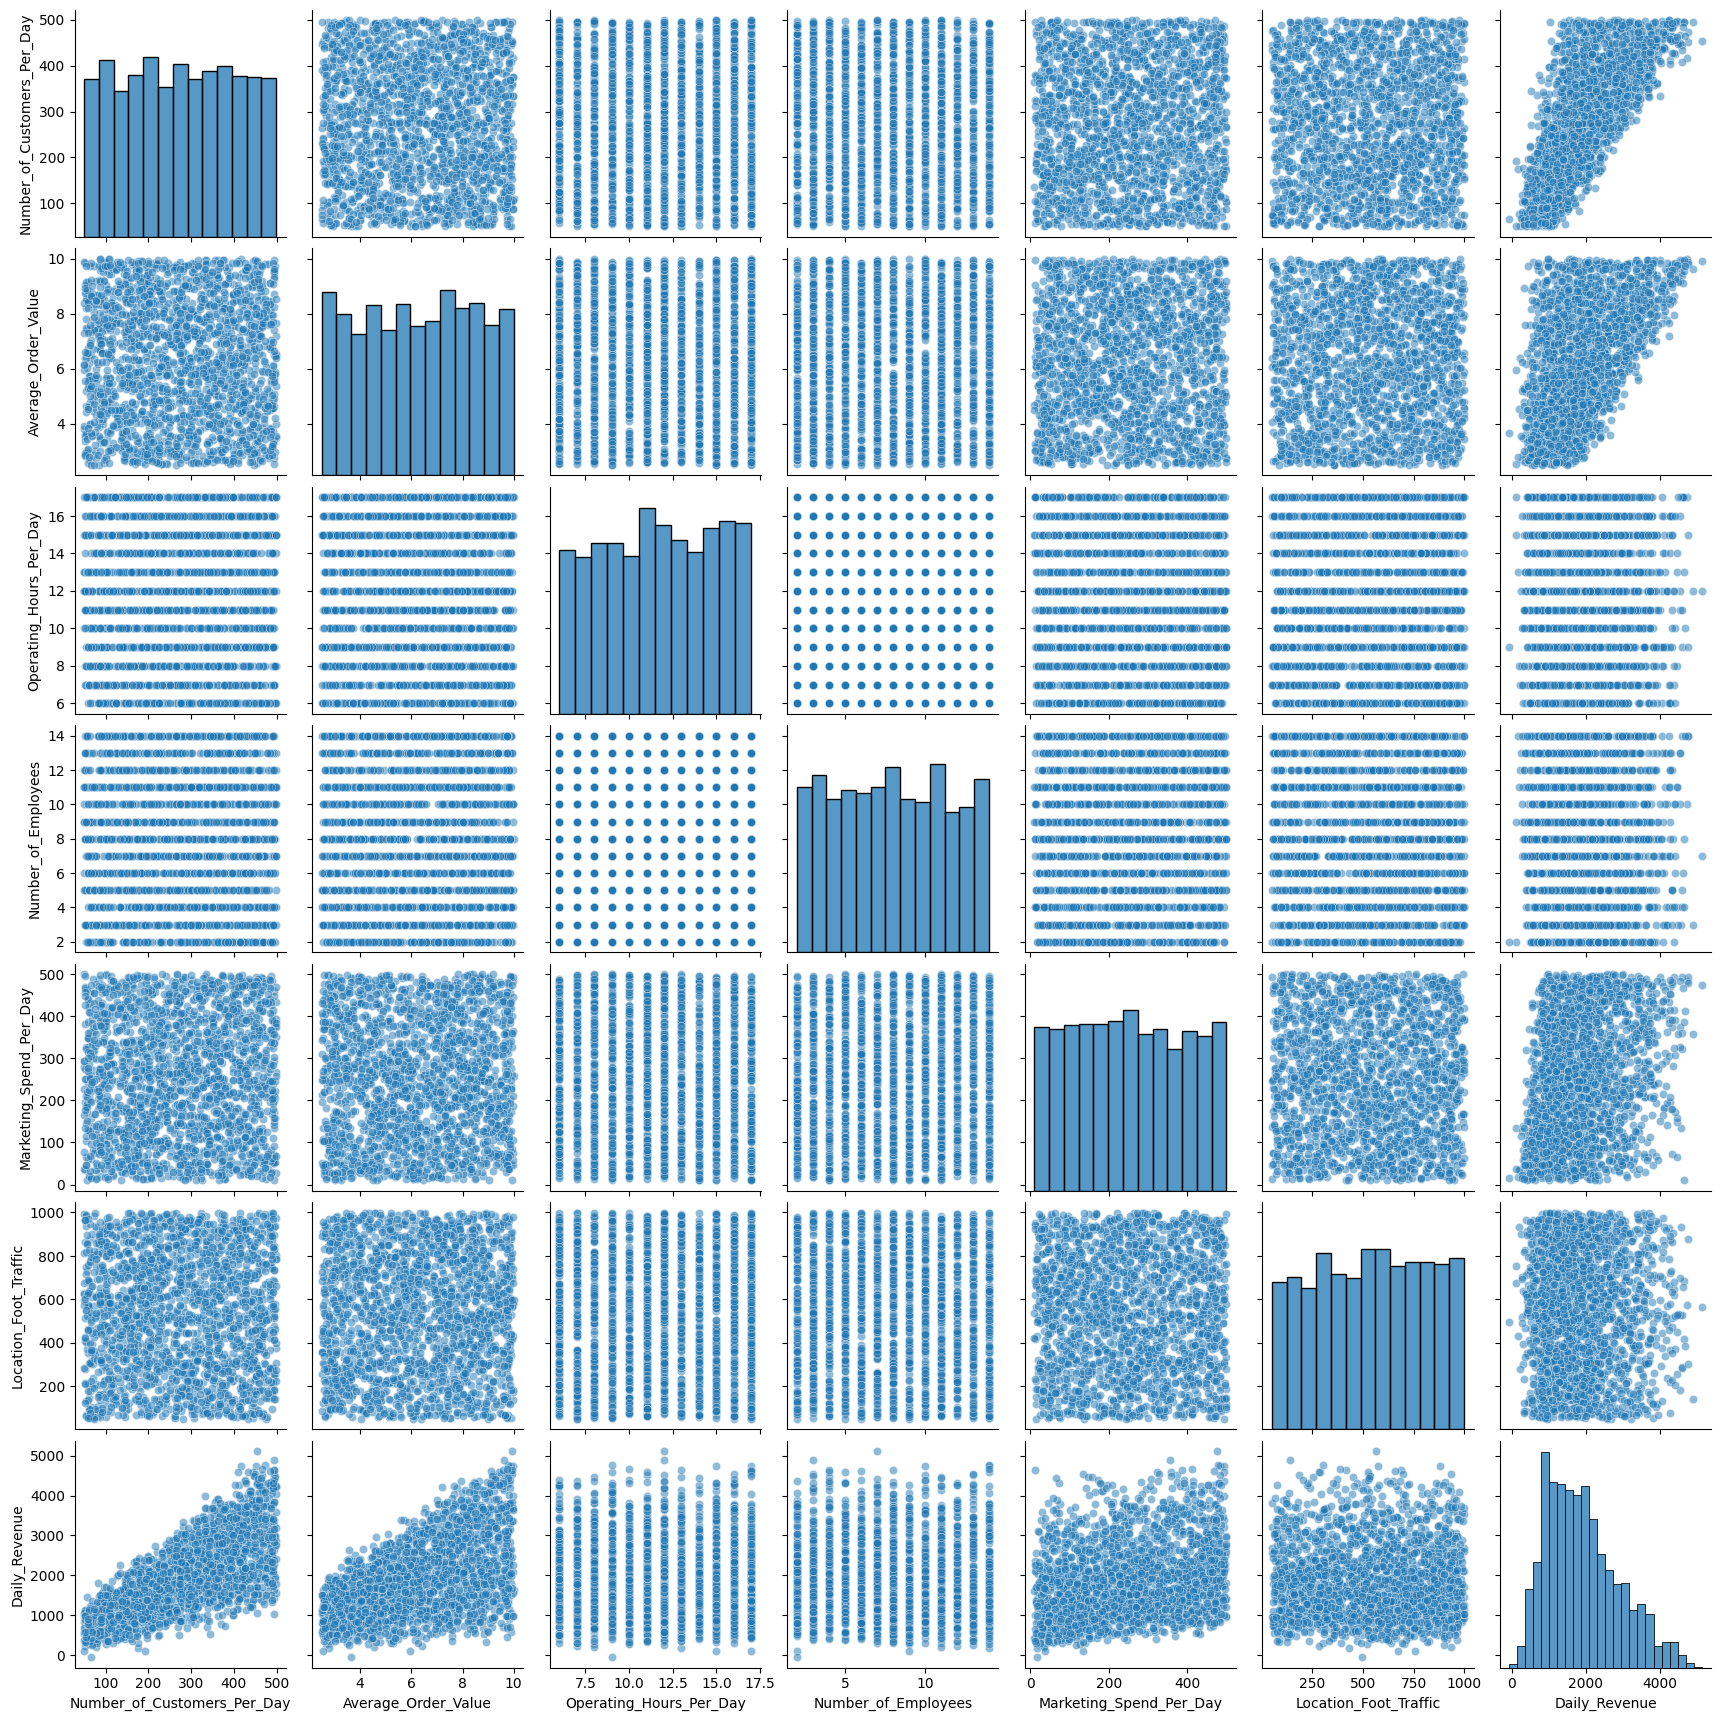

In [256]:
sns.pairplot(regression_data, kind='scatter', plot_kws={'alpha' : 0.5})

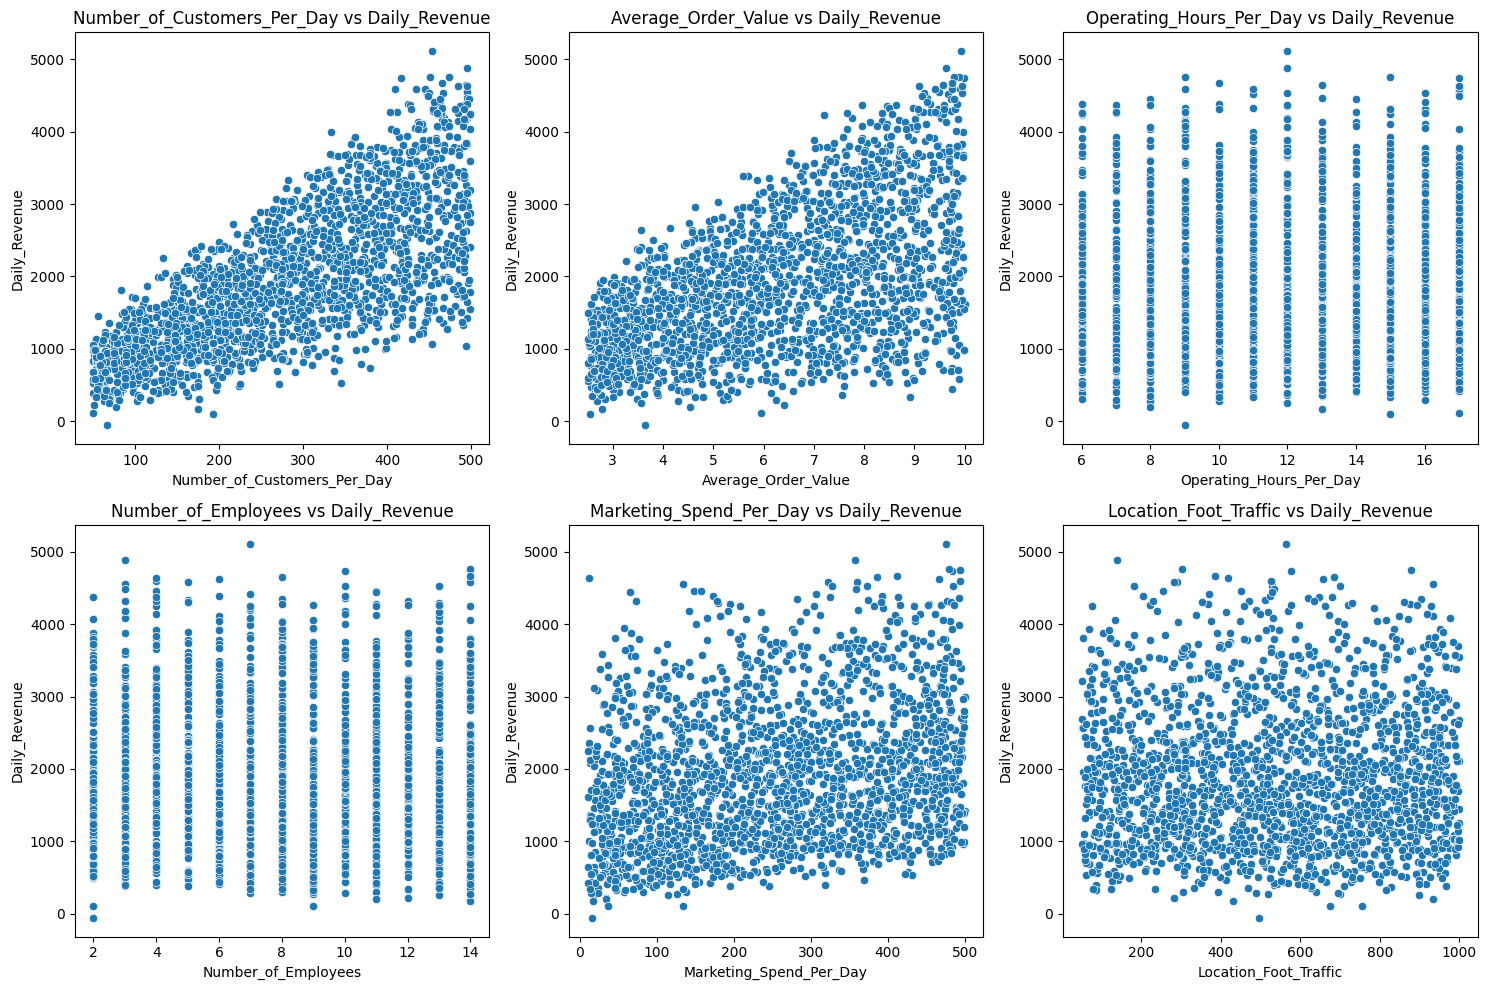

In [257]:
# Scatter plots of each feature vs Daily_Revenue
features = regression_data.columns[:-1]  # except target
target = 'Daily_Revenue'

plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=regression_data[col], y=regression_data[target])
    plt.title(f'{col} vs {target}')
plt.tight_layout()
plt.show()

<span style="color: blue; font-weight: bold; font-size: 18px; ">Model 1: Simple linear regression</span>


<span style="color: red;">**Number_of_Customers_Per_Day and Average_Order_Value are strongly correlated with `Daily_Revenue`**</span>


_Finding the most effective endpentant variable_

---

**- Models Performance**

      Check the R_Square score for each variable

      Check the total errors by calculating the mean square errors for each variable


<span style="color: cyan;">**-- Number_of_Customers_Per_Day Model**</span>


In [258]:
# Model variables
X = regression_data[['Number_of_Customers_Per_Day']]
Y = regression_data['Daily_Revenue']

# fitting the model
model1 = LinearRegression()
model1.fit(X, Y)

# Predictions
Y_predict = model1.predict(X)

# Model Matrices
R2_Score_1 = r2_score(Y, Y_predict)
MSE_1 = mean_squared_error(Y, Y_predict)

<span style="color: cyan;">**-- Average_Order_Value Model**</span>


In [259]:
# Model variables
X = regression_data[['Average_Order_Value']]
Y = regression_data['Daily_Revenue']

# fitting the model
model2 = LinearRegression()
model2.fit(X, Y)

# Predictions
Y_predict = model2.predict(X)

# Model Matrices
R2_Score_2 = r2_score(Y, Y_predict)
MSE_2 = mean_squared_error(Y, Y_predict)

---

**- Evaluate the Performance of each variable to check the best one**


<span style="color: red;">Visualize how much variance each model explains in `Daily_Revenue` : </span>


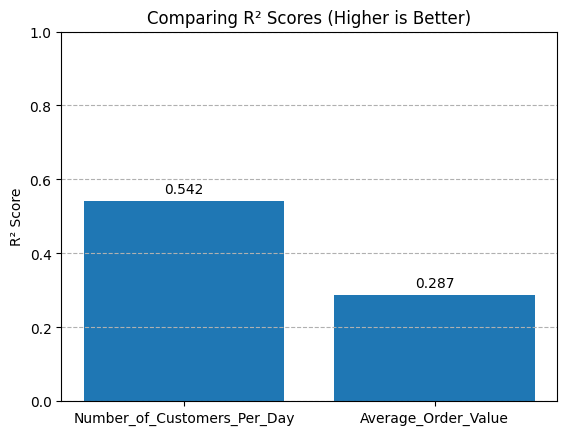

In [260]:
# Data
features = ['Number_of_Customers_Per_Day', 'Average_Order_Value']
R2_Scores = [R2_Score_1, R2_Score_2]

# Plot
plt.bar(features, R2_Scores)
plt.title("Comparing R² Scores (Higher is Better)")
plt.ylabel('R² Score')
plt.ylim(0, 1)  # R² ranges from 0 to 1
plt.grid(axis='y', linestyle='--')

# Add value labels
for i, score in enumerate(R2_Scores):
    plt.text(i, score + 0.02, f'{score:.3f}', ha='center')

plt.show()

<span style="color: red;">Visualize Compare prediction errors of each model in `Daily_Revenue` : </span>


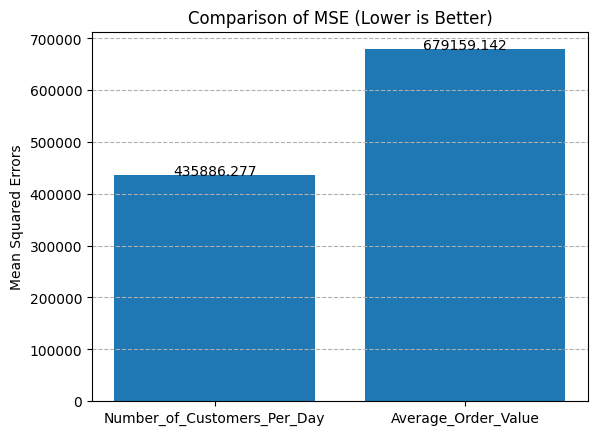

In [261]:
# Data
features = ['Number_of_Customers_Per_Day', 'Average_Order_Value']
MSE_Values = [MSE_1, MSE_2]

#Plot
plt.bar(features, MSE_Values)
plt.title('Comparison of MSE (Lower is Better)')
plt.ylabel('Mean Squared Errors')
plt.grid(axis='y', linestyle='--')

# Add value labels
for i, mse in enumerate(MSE_Values):
    plt.text(i, mse + 0.02, f'{mse:.3f}', ha='center')

plt.show()

---
_Results of checking performance_

** **

R² Score is `higher` for Number_of_Customers_Per_Day

MSE is `lower` for Number_of_Customers_Per_Day

--> Number_of_Customers_Per_Day is the best endpentant variable for the model
---


<span style="color:rgb(181, 52, 255); font-weight: bold; font-size: 20px;">-- Retrain the model with the selected endpentant variable </span>


<span style="color:cyan; font-weight: funny; font-size: 15px;"> 1- Splitting the data into (80/20)</span>


In [262]:
X = regression_data[['Number_of_Customers_Per_Day']]  # coefficient column
Y = regression_data['Daily_Revenue']  # Target column

In [263]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state=7)

In [264]:
X_train

Number_of_Customers_Per_Day
1773                          459
13                            422
389                           414
946                           144
596                           339
...                           ...
1603                          471
502                           320
537                           278
1220                           50
175                           437

[1600 rows x 1 columns]

In [265]:
X_test

Number_of_Customers_Per_Day
1072                          105
1048                          219
204                           380
694                           391
1758                          129
...                           ...
43                            100
1090                          105
9                             171
1338                          146
147                           409

[400 rows x 1 columns]

In [266]:
Y_train

1773    3846.70
13      1817.02
389     3487.98
946      885.01
596     2186.01
         ...   
1603    3182.85
502     2635.07
537     1904.45
1220     382.77
175     1904.28
Name: Daily_Revenue, Length: 1600, dtype: float64

In [267]:
Y_test

1072     328.22
1048    1890.32
204     1982.68
694     2165.16
1758     989.97
         ...   
43      1177.41
1090    1407.92
9       2025.55
1338    1768.82
147     2936.39
Name: Daily_Revenue, Length: 400, dtype: float64

<span style="color:cyan; font-weight: funny; font-size: 15px;"> 2- Training the model </span>


In [268]:
# fitting the model
Linear_Model = LinearRegression()
Linear_Model.fit(X_train, Y_train)

LinearRegression()

<span style="color:cyan; font-weight: funny; font-size: 15px;"> 3- Predicting the model values </span>


In [269]:
# Prediction
Y_train_pred = Linear_Model.predict(X_train)
Y_test_pred = Linear_Model.predict(X_test)

<span style="color:cyan; font-weight: funny; font-size: 15px;"> 4- Evaluating the model </span>


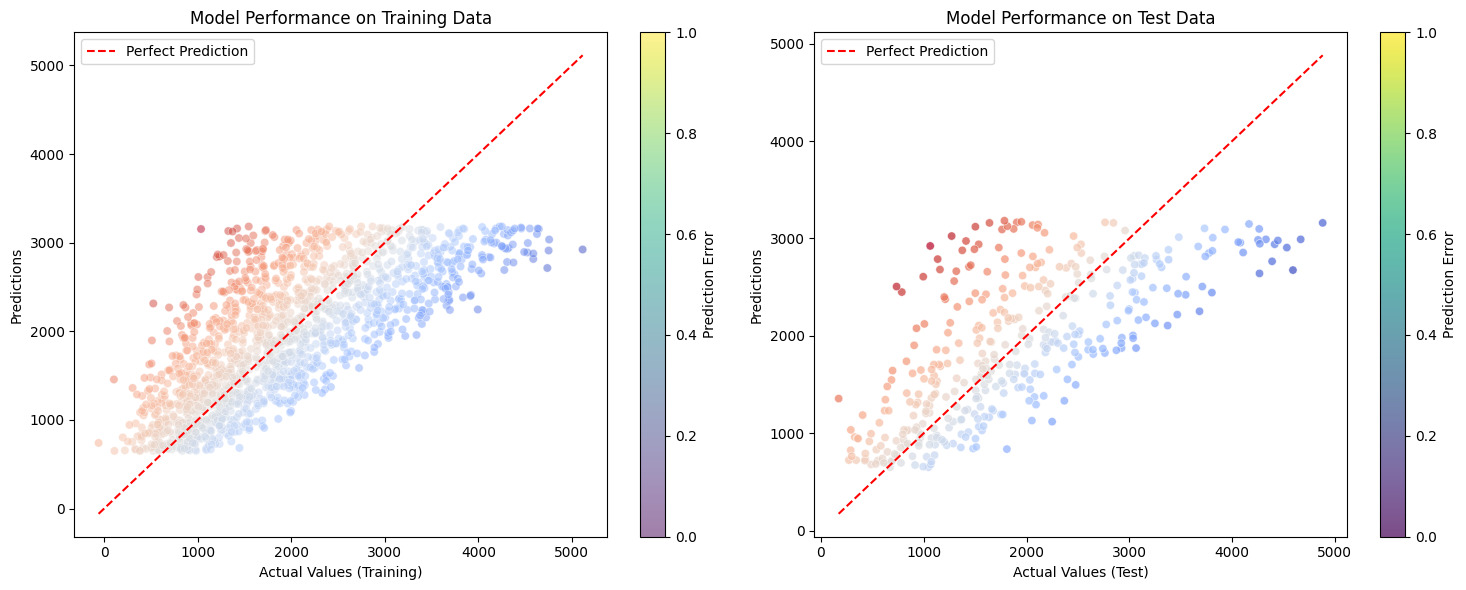

In [270]:
# Create figure with two subplots
plt.figure(figsize=(15, 6))

# Subplot 1: Training Data Performance
plt.subplot(1, 2, 1)

# Scatter plot with error coloring - CORRECTED 'palette' spelling
scatter = sns.scatterplot(x=Y_train, y=Y_train_pred,
                         hue=Y_train_pred - Y_train,
                         palette='coolwarm',  # Fixed typo here
                         alpha=0.5,
                         legend=False)

# prediction line
plt.plot([min(Y_train), max(Y_train)], 
         [min(Y_train), max(Y_train)], 
         'r--', label='Perfect Prediction')

# Plot formatting
plt.colorbar(scatter.collections[0], label='Prediction Error')  # Added colorbar for consistency
plt.xlabel("Actual Values (Training)")
plt.ylabel("Predictions")
plt.title("Model Performance on Training Data")
plt.legend()

# Subplot 2: Test Data Performance
plt.subplot(1, 2, 2)

# Scatter plot with error coloring
scatter = sns.scatterplot(x=Y_test, y=Y_test_pred,
                         hue=Y_test_pred - Y_test,
                         palette='coolwarm',
                         alpha=0.7,
                         legend=False)

# prediction line
plt.plot([min(Y_test), max(Y_test)], 
         [min(Y_test), max(Y_test)], 
         'r--', label='Perfect Prediction')

# Plot formatting
plt.colorbar(scatter.collections[0], label='Prediction Error')
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predictions")
plt.title("Model Performance on Test Data")
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

<span style="color:cyan; font-weight: funny; font-size: 15px;"> 5 - Quantitative Evaluation </span>


In [271]:
print("\nModel Evaluation Metrics:")
print("-------------------------------------")
print(f"R² (Training): {r2_score(Y_train, Y_train_pred):.4f}")
print(f"MSE (Training): {mean_squared_error(Y_train, Y_train_pred):.2f}")
print("-------------------------------------")
print(f"R² (Test): {r2_score(Y_test, Y_test_pred):.4f}")
print(f"MSE (Test): {mean_squared_error(Y_test, Y_test_pred):.2f}")
print("-------------------------------------")


Model Evaluation Metrics:
-------------------------------------
R² (Training): 0.5559
MSE (Training): 423687.90
-------------------------------------
R² (Test): 0.4871
MSE (Test): 485300.37
-------------------------------------


<span style="color:cyan; font-weight: funny; font-size: 15px;"> 6- Interpreting Model Coefficients </span>


In [272]:
print("\nIntercept and Coefficient:")
print("-------------------------------------")
print(f"Intercept (B0): {Linear_Model.intercept_:.2f}")
print(f"Coefficient (B1): {Linear_Model.coef_[0]:.4f}")
print("-------------------------------------")



Intercept and Coefficient:
-------------------------------------
Intercept (B0): 368.57
Coefficient (B1): 5.6387
-------------------------------------


<span style="color:cyan; font-weight: funny; font-size: 15px;"> 7- Displaying the Final Regression Equationn </span>


In [273]:
feature_name = X.columns[0]  # Number_of_Customers_Per_Day
B0 = Linear_Model.intercept_
B1 = Linear_Model.coef_[0]

print("\nFinal Regression Equation:")
print("-------------------------------------")
print(f"Daily_Revenue = {B0:.2f} + {B1:.4f} * {feature_name}")
print("-------------------------------------")


Final Regression Equation:
-------------------------------------
Daily_Revenue = 368.57 + 5.6387 * Number_of_Customers_Per_Day
-------------------------------------


---
---


<span style="color: blue; font-weight: bold; font-size: 18px; ">Model 2: Multivariables linear regression</span>


<span style="color: red;">Number_of_Customers_Per_Day and Average_Order_Value are strongly correlated with `Daily_Revenue` and will be the coefficients of the linear regression..</span>


<span style="color:rgb(181, 52, 255); font-weight: bold; font-size: 20px;">-- Training the Model with multivariable regression </span>


In [274]:
Multi_X = regression_data[['Number_of_Customers_Per_Day', 'Average_Order_Value']]  # coefficient columns
Multi_Y = regression_data['Daily_Revenue']  # Target column

<span style="color:cyan; font-weight: funny; font-size: 15px;"> 1- Splitting the data into (80/20)</span>


In [275]:
Multi_X_train, Multi_X_test, Multi_Y_train, Multi_Y_test = train_test_split(Multi_X,Multi_Y,test_size=0.2, random_state=7)

<span style="color:cyan; font-weight: funny; font-size: 15px;"> 2- Training the model </span>


In [276]:
# fitting the model
Multi_Linear_Model = LinearRegression()
Multi_Linear_Model.fit(Multi_X_train, Multi_Y_train)

LinearRegression()

<span style="color:cyan; font-weight: funny; font-size: 15px;"> 3- Predicting the model values </span>


In [277]:
# Prediction
Multi_Y_train_pred = Multi_Linear_Model.predict(Multi_X_train)
Multi_Y_test_pred = Multi_Linear_Model.predict(Multi_X_test)

<span style="color:cyan; font-weight: funny; font-size: 15px;"> 4- Evaluating the model </span>


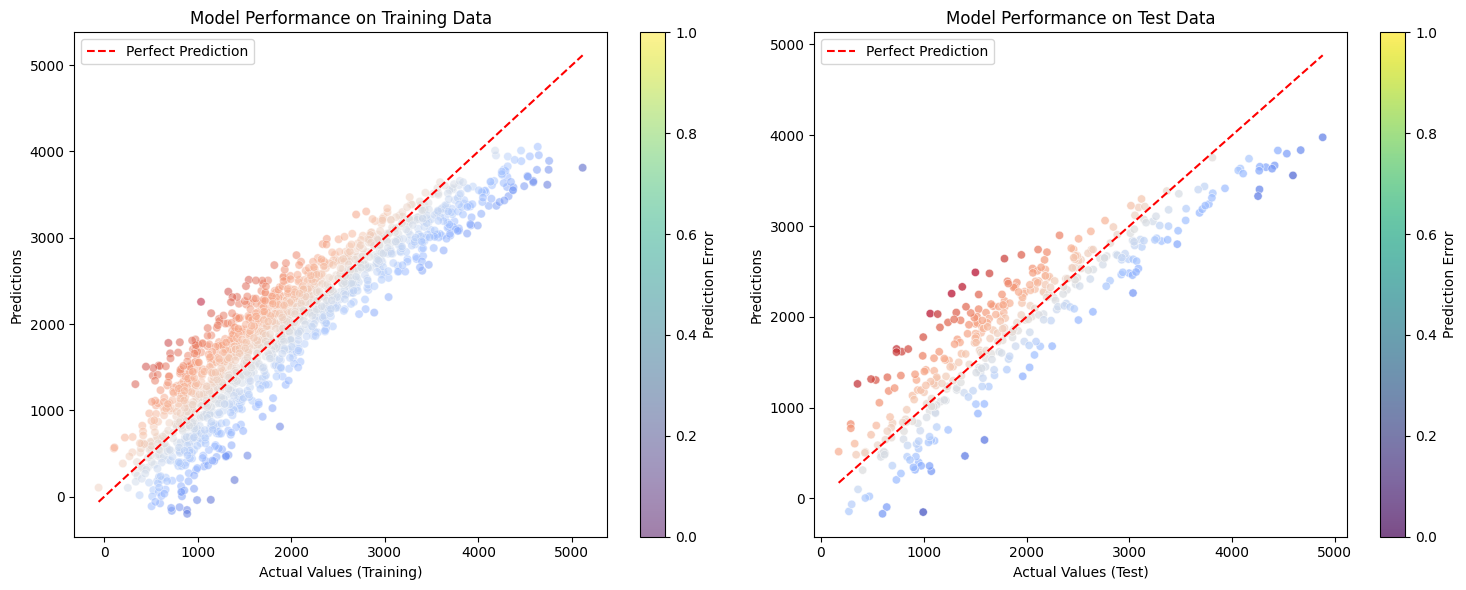

In [278]:
# Create figure with two subplots
plt.figure(figsize=(15, 6))

# Subplot 1: Training Data Performance
plt.subplot(1, 2, 1)

scatter = sns.scatterplot(x=Multi_Y_train, y=Multi_Y_train_pred,
                          hue=Multi_Y_train_pred - Multi_Y_train,
                          palette='coolwarm',
                          alpha=0.5,
                          legend=False)

plt.plot([min(Multi_Y_train), max(Multi_Y_train)], 
         [min(Multi_Y_train), max(Multi_Y_train)], 
         'r--', label='Perfect Prediction')

plt.colorbar(scatter.collections[0], label='Prediction Error')
plt.xlabel("Actual Values (Training)")
plt.ylabel("Predictions")
plt.title("Model Performance on Training Data")
plt.legend()


# Subplot 2: Test Data Performance
plt.subplot(1, 2, 2)

scatter = sns.scatterplot(x=Multi_Y_test, y=Multi_Y_test_pred,
                          hue=Multi_Y_test_pred - Multi_Y_test,
                          palette='coolwarm',
                          alpha=0.7,
                          legend=False)

plt.plot([min(Multi_Y_test), max(Multi_Y_test)], 
         [min(Multi_Y_test), max(Multi_Y_test)], 
         'r--', label='Perfect Prediction')

plt.colorbar(scatter.collections[0], label='Prediction Error')
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predictions")
plt.title("Model Performance on Test Data")
plt.legend()

plt.tight_layout()
plt.show()

<span style="color:cyan; font-weight: funny; font-size: 15px;"> 5- Quantitative Evaluation </span>


In [279]:
print("\nModel Evaluation Metrics:")
print("-------------------------------------")
print(f"R² (Training): {r2_score(Multi_Y_train, Multi_Y_train_pred):.4f}")
print(f"MSE (Training): {mean_squared_error(Multi_Y_train, Multi_Y_train_pred):.2f}")
print("-------------------------------------")
print(f"R² (Test): {r2_score(Multi_Y_test, Multi_Y_test_pred):.4f}")
print(f"MSE (Test): {mean_squared_error(Multi_Y_test, Multi_Y_test_pred):.2f}")
print("-------------------------------------")


Model Evaluation Metrics:
-------------------------------------
R² (Training): 0.8433
MSE (Training): 149460.75
-------------------------------------
R² (Test): 0.8313
MSE (Test): 159642.79
-------------------------------------


<span style="color:cyan; font-weight: funny; font-size: 15px;"> 6- Interpreting Model Coefficients </span>


In [280]:
print("\nIntercept and Coefficients:")
print("-------------------------------------")
print(f"Intercept   (B0): {Multi_Linear_Model.intercept_:.2f}")
for i, feature in enumerate(Multi_X.columns):
    print(f"Coefficient (B{i+1}) for {feature}: {Multi_Linear_Model.coef_[i]:.4f}")
print("-------------------------------------")



Intercept and Coefficients:
-------------------------------------
Intercept   (B0): -1144.88
Coefficient (B1) for Number_of_Customers_Per_Day: 5.6607
Coefficient (B2) for Average_Order_Value: 240.9206
-------------------------------------


<span style="color:cyan; font-weight: funny; font-size: 15px;"> 7- Displaying the Final Regression Equation </span>


In [281]:
B0 = Multi_Linear_Model.intercept_
coefficients = Multi_Linear_Model.coef_
features = Multi_X.columns

# Building equation string
equation = f"Daily_Revenue = {B0:.2f}"
for i, (feature, coef) in enumerate(zip(features, coefficients)):
    equation += f" + {coef:.4f} * {feature}"

print("\nFinal Regression Equation:")
print("-------------------------------------")
print(equation)
print("-------------------------------------")



Final Regression Equation:
-------------------------------------
Daily_Revenue = -1144.88 + 5.6607 * Number_of_Customers_Per_Day + 240.9206 * Average_Order_Value
-------------------------------------


---
---
